# Data Preparation - LMA Features Data

## Imports

In [2]:
import ast
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTENC, SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from collections import Counter
import numpy as np

### Load Dataset

In [3]:
data = pd.read_csv('lma_features/LMA_DATA.csv')

In [4]:
data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_total_body_volume,avg_distance_traveled,EMOTION
0,0.440457,0.268696,0.232545,0.262020,0.469732,0.453368,0.351519,0.334725,0.286151,0.278746,...,-0.001553,-0.004276,-0.003432,-0.001553,-0.004276,-0.003432,0.028602,0.223692,0.000175,angry
1,0.436696,0.266929,0.231202,0.270096,0.468911,0.452745,0.350940,0.334144,0.286151,0.278748,...,-0.001765,-0.001323,-0.012256,-0.001765,-0.001323,-0.012256,0.028540,0.223304,0.000057,angry
2,0.429922,0.264091,0.228568,0.278028,0.467631,0.451541,0.350120,0.333041,0.286151,0.278751,...,-0.000829,0.010741,-0.015035,-0.000829,0.010741,-0.015035,0.028424,0.222493,0.000173,angry
3,0.420335,0.262567,0.222643,0.286988,0.467149,0.448736,0.349962,0.330507,0.286151,0.278767,...,-0.034921,0.002394,-0.002680,-0.034921,0.002394,-0.002680,0.028234,0.220828,0.000941,angry
4,0.404506,0.261934,0.217203,0.295619,0.450226,0.435649,0.340933,0.322575,0.286151,0.278727,...,0.013267,-0.134403,0.026550,0.013267,-0.134403,0.026550,0.028782,0.224766,0.002854,angry


## Feature Selection

In [7]:
data = pd.read_csv('datasets/pa/LMA_DATA.csv')

In [8]:
y = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A']], axis=1)
X = data

data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_pelvis_velocity_z,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_total_body_volume,avg_distance_traveled
0,0.440457,0.268696,0.232545,0.262020,0.469732,0.453368,0.351519,0.334725,0.286151,0.278746,...,-0.013351,-0.001553,-0.004276,-0.003432,-0.001553,-0.004276,-0.003432,0.028602,0.223692,0.000175
1,0.436696,0.266929,0.231202,0.270096,0.468911,0.452745,0.350940,0.334144,0.286151,0.278748,...,-0.001902,-0.001765,-0.001323,-0.012256,-0.001765,-0.001323,-0.012256,0.028540,0.223304,0.000057
2,0.429922,0.264091,0.228568,0.278028,0.467631,0.451541,0.350120,0.333041,0.286151,0.278751,...,0.005425,-0.000829,0.010741,-0.015035,-0.000829,0.010741,-0.015035,0.028424,0.222493,0.000173
3,0.420335,0.262567,0.222643,0.286988,0.467149,0.448736,0.349962,0.330507,0.286151,0.278767,...,-0.045460,-0.034921,0.002394,-0.002680,-0.034921,0.002394,-0.002680,0.028234,0.220828,0.000941
4,0.404506,0.261934,0.217203,0.295619,0.450226,0.435649,0.340933,0.322575,0.286151,0.278727,...,0.340085,0.013267,-0.134403,0.026550,0.013267,-0.134403,0.026550,0.028782,0.224766,0.002854


### Variance Analysis

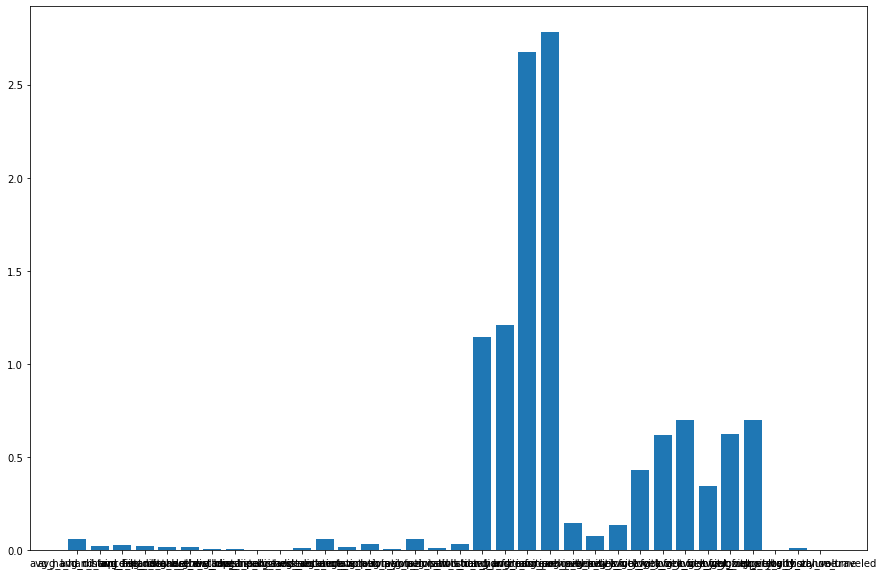

avg_hand_distance  -  0.059752436026422766
avg_l_hand_hip_distance  -  0.022431200150230396
avg_r_hand_hip_distance  -  0.026245158129118512
avg_feet_distance  -  0.020167094446756673
avg_l_hand_chest_distance  -  0.013090050017565512
avg_r_hand_chest_distance  -  0.013217819717644677
avg_l_elbow_hip_distance  -  0.005963315475819392
avg_r_elbow_hip_distance  -  0.006182250098241396
avg_chest_pelvis_distance  -  2.6726887894248355e-19
avg_neck_chest_distance  -  7.347478152341402e-06
avg_neck_rotation_w  -  0.008041907194429923
avg_neck_rotation_x  -  0.05917721871423906
avg_neck_rotation_y  -  0.017612325527994396
avg_neck_rotation_z  -  0.03287836074476489
avg_pelvis_rotation_w  -  0.004765774452136383
avg_pelvis_rotation_x  -  0.06064529012694464
avg_pelvis_rotation_y  -  0.01232356911762076
avg_pelvis_rotation_z  -  0.031246152378594013
std_l_hand_position  -  1.1427583675704425
std_r_hand_position  -  1.2096784598935832
avg_l_forearm_velocity  -  2.673674062470529
avg_r_forearm_ve

In [9]:
x_fs = []
y_fs = []
for i in data.columns:
    x_fs.append(data[i].var())
    y_fs.append(i)


fig, ax = plt.subplots(figsize=(15,10))

ax.bar(y_fs, x_fs)

plt.show()

for i in data.columns:
    print(i, " - ", data[i].var())

## Remove highly correlated features

In [19]:
data = pd.read_csv('datasets/pa/LMA_DATA.csv')

In [20]:
y = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A']], axis=1)
X = data

data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_pelvis_velocity_z,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_total_body_volume,avg_distance_traveled
0,0.440457,0.268696,0.232545,0.262020,0.469732,0.453368,0.351519,0.334725,0.286151,0.278746,...,-0.013351,-0.001553,-0.004276,-0.003432,-0.001553,-0.004276,-0.003432,0.028602,0.223692,0.000175
1,0.436696,0.266929,0.231202,0.270096,0.468911,0.452745,0.350940,0.334144,0.286151,0.278748,...,-0.001902,-0.001765,-0.001323,-0.012256,-0.001765,-0.001323,-0.012256,0.028540,0.223304,0.000057
2,0.429922,0.264091,0.228568,0.278028,0.467631,0.451541,0.350120,0.333041,0.286151,0.278751,...,0.005425,-0.000829,0.010741,-0.015035,-0.000829,0.010741,-0.015035,0.028424,0.222493,0.000173
3,0.420335,0.262567,0.222643,0.286988,0.467149,0.448736,0.349962,0.330507,0.286151,0.278767,...,-0.045460,-0.034921,0.002394,-0.002680,-0.034921,0.002394,-0.002680,0.028234,0.220828,0.000941
4,0.404506,0.261934,0.217203,0.295619,0.450226,0.435649,0.340933,0.322575,0.286151,0.278727,...,0.340085,0.013267,-0.134403,0.026550,0.013267,-0.134403,0.026550,0.028782,0.224766,0.002854


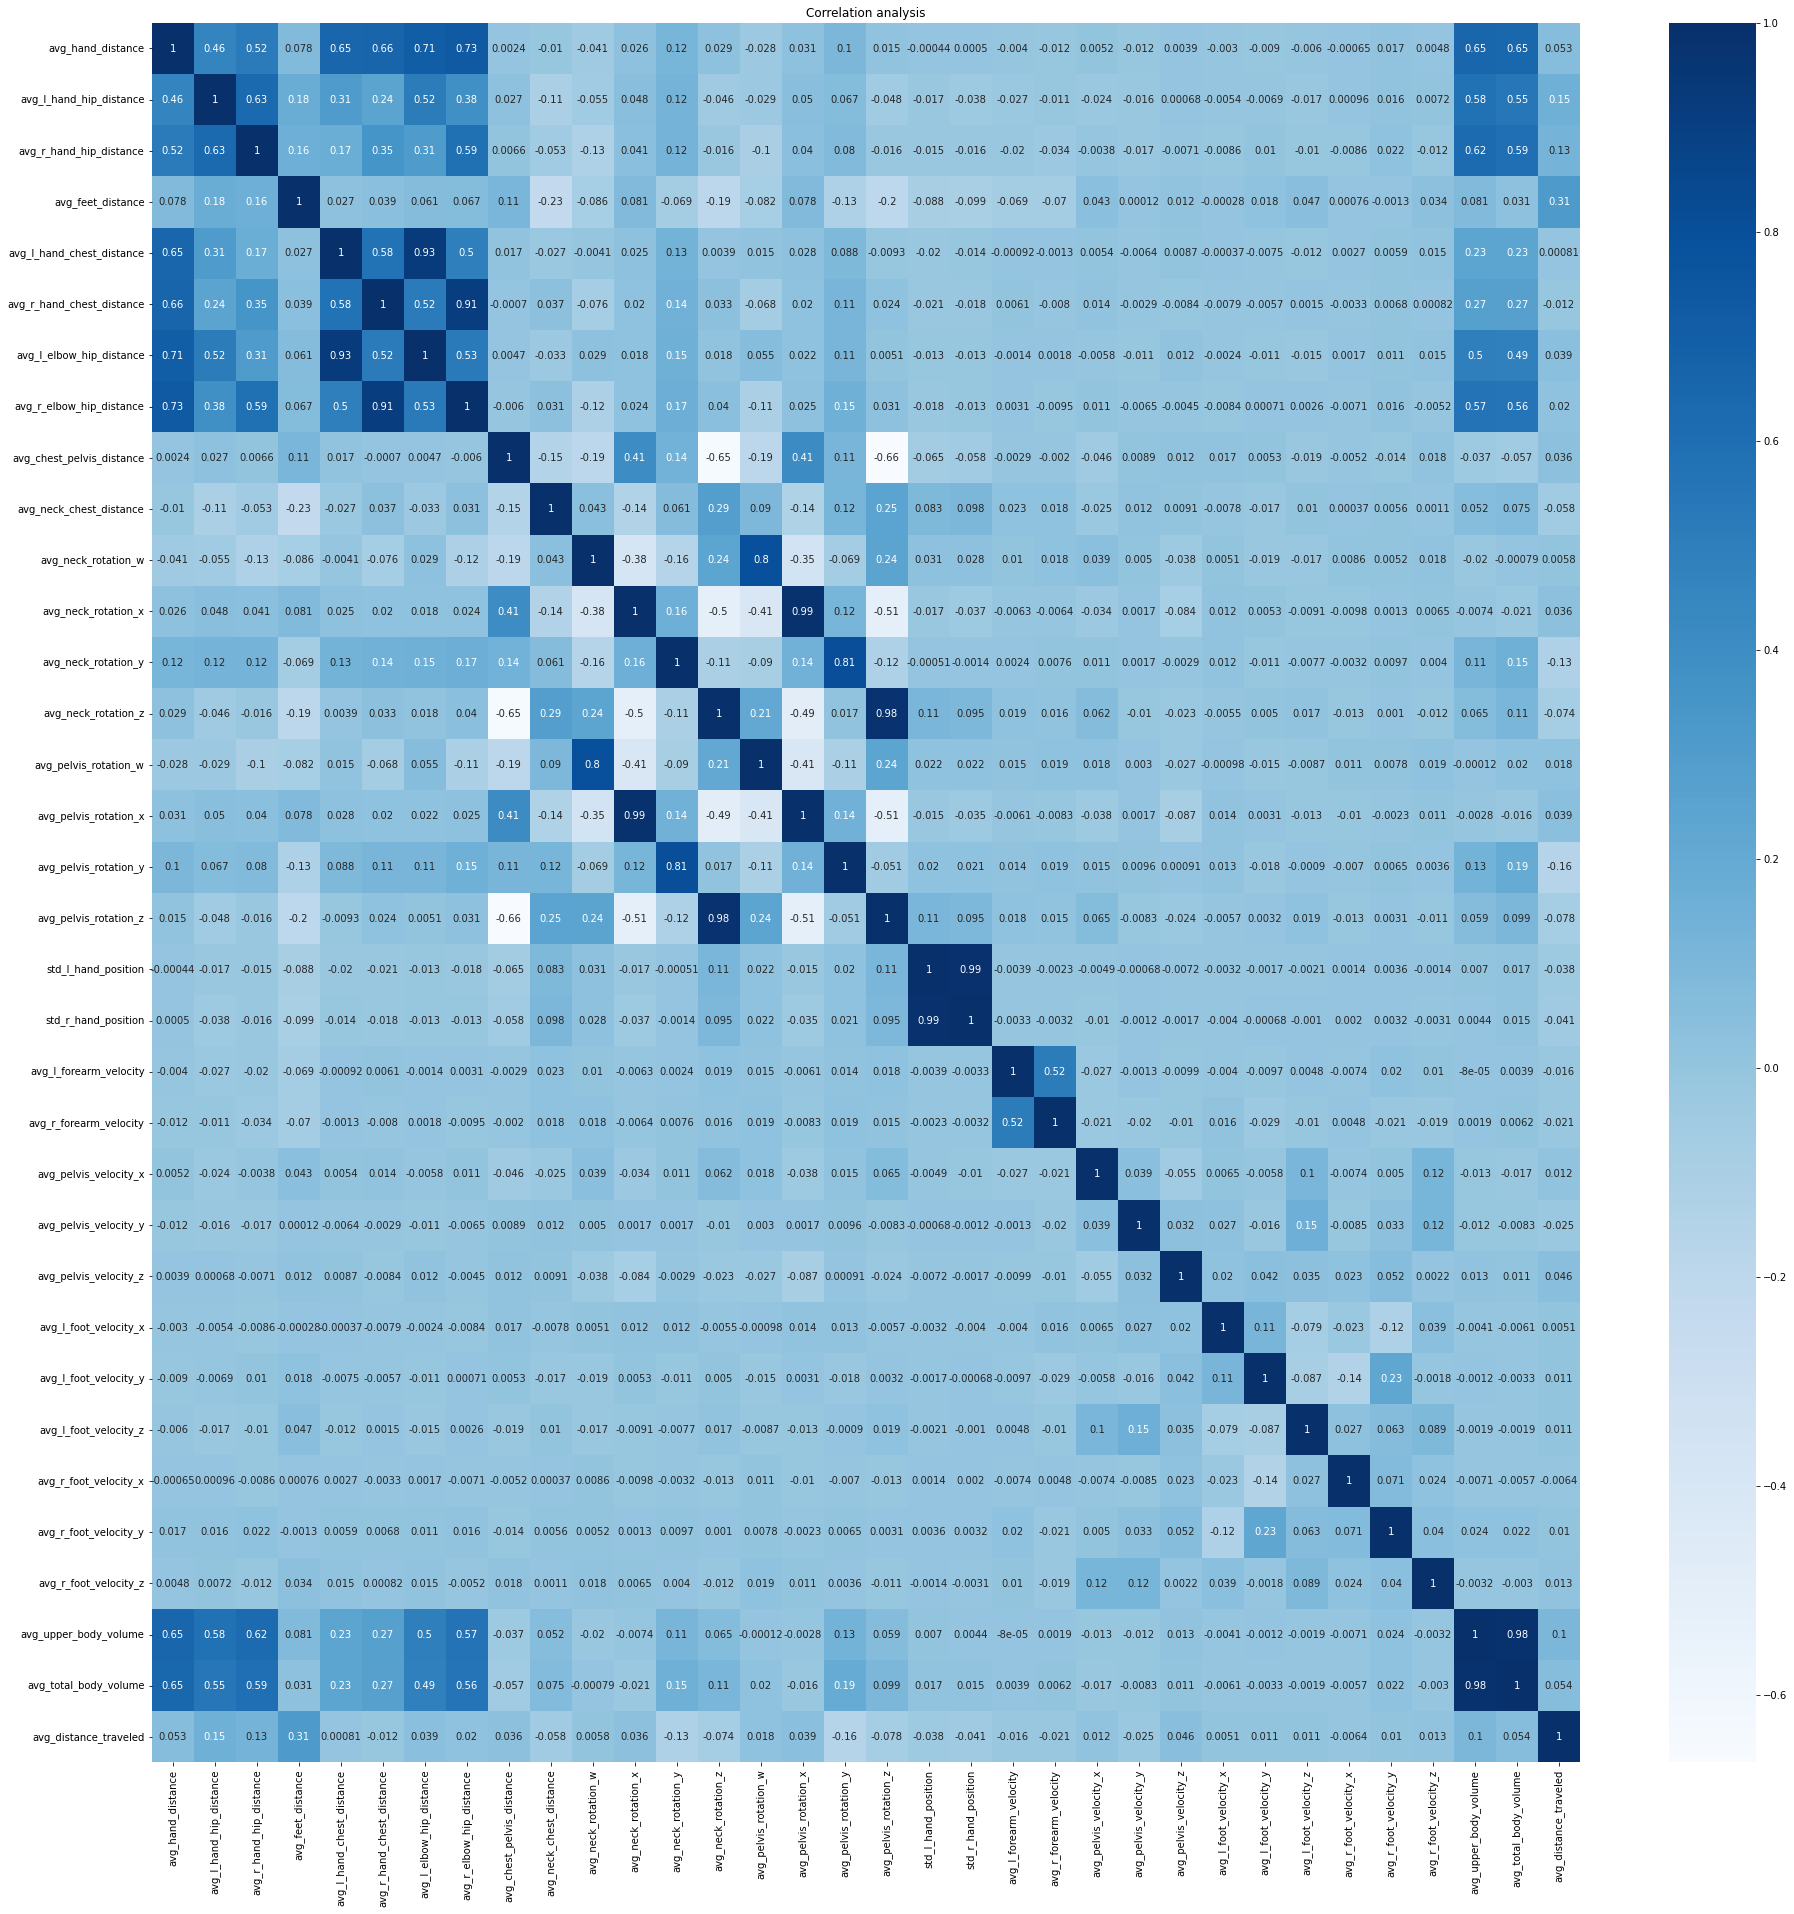

In [21]:
fig = plt.figure(figsize=[32,32])
corr_mtx = data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [22]:
cor_matrix = data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['avg_pelvis_rotation_x', 'avg_pelvis_rotation_z', 'std_r_hand_position', 'avg_total_body_volume']


In [23]:
X = X.drop(columns=['avg_total_body_volume'])

In [24]:
#Store

fullData = X.join(y, how='right')
fullData.to_csv(r'datasets/pa/mREDUCED_LMA_DATA.csv', index = False)

In [25]:
data = pd.read_csv('datasets/pa/mREDUCED_LMA_DATA.csv')
data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_distance_traveled,EMOTION_P,EMOTION_A
0,0.440457,0.268696,0.232545,0.262020,0.469732,0.453368,0.351519,0.334725,0.286151,0.278746,...,-0.001553,-0.004276,-0.003432,-0.001553,-0.004276,-0.003432,0.028602,0.000175,-0.5,0.6
1,0.436696,0.266929,0.231202,0.270096,0.468911,0.452745,0.350940,0.334144,0.286151,0.278748,...,-0.001765,-0.001323,-0.012256,-0.001765,-0.001323,-0.012256,0.028540,0.000057,-0.5,0.6
2,0.429922,0.264091,0.228568,0.278028,0.467631,0.451541,0.350120,0.333041,0.286151,0.278751,...,-0.000829,0.010741,-0.015035,-0.000829,0.010741,-0.015035,0.028424,0.000173,-0.5,0.6
3,0.420335,0.262567,0.222643,0.286988,0.467149,0.448736,0.349962,0.330507,0.286151,0.278767,...,-0.034921,0.002394,-0.002680,-0.034921,0.002394,-0.002680,0.028234,0.000941,-0.5,0.6
4,0.404506,0.261934,0.217203,0.295619,0.450226,0.435649,0.340933,0.322575,0.286151,0.278727,...,0.013267,-0.134403,0.026550,0.013267,-0.134403,0.026550,0.028782,0.002854,-0.5,0.6


## Data Balancing

In [26]:
data = pd.read_csv('datasets/pa/mREDUCED_LMA_DATA.csv')
data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_distance_traveled,EMOTION_P,EMOTION_A
0,0.440457,0.268696,0.232545,0.262020,0.469732,0.453368,0.351519,0.334725,0.286151,0.278746,...,-0.001553,-0.004276,-0.003432,-0.001553,-0.004276,-0.003432,0.028602,0.000175,-0.5,0.6
1,0.436696,0.266929,0.231202,0.270096,0.468911,0.452745,0.350940,0.334144,0.286151,0.278748,...,-0.001765,-0.001323,-0.012256,-0.001765,-0.001323,-0.012256,0.028540,0.000057,-0.5,0.6
2,0.429922,0.264091,0.228568,0.278028,0.467631,0.451541,0.350120,0.333041,0.286151,0.278751,...,-0.000829,0.010741,-0.015035,-0.000829,0.010741,-0.015035,0.028424,0.000173,-0.5,0.6
3,0.420335,0.262567,0.222643,0.286988,0.467149,0.448736,0.349962,0.330507,0.286151,0.278767,...,-0.034921,0.002394,-0.002680,-0.034921,0.002394,-0.002680,0.028234,0.000941,-0.5,0.6
4,0.404506,0.261934,0.217203,0.295619,0.450226,0.435649,0.340933,0.322575,0.286151,0.278727,...,0.013267,-0.134403,0.026550,0.013267,-0.134403,0.026550,0.028782,0.002854,-0.5,0.6


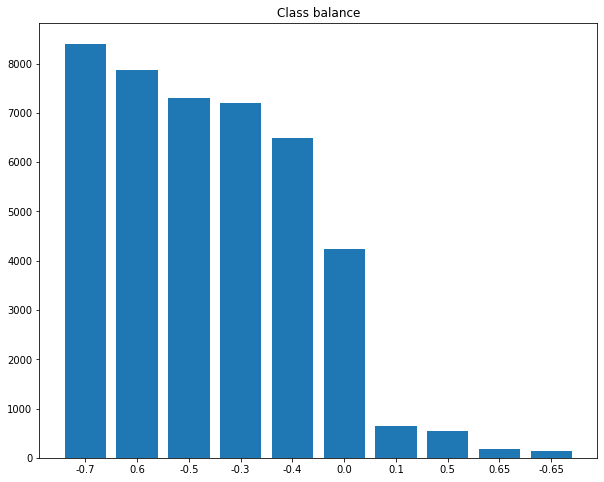

In [28]:
target_count = data['EMOTION_P'].value_counts()

plt.figure(figsize=(10,8))
plt.title('Class balance')
plt.bar([str(a) for a in target_count.index], target_count.values)
plt.show()

Class=0.6, n=7296 (16.952%)
Class=0.55, n=7876 (18.300%)
Class=-0.3, n=8406 (19.531%)
Class=0.25, n=6491 (15.082%)
Class=0.7, n=7209 (16.750%)
Class=0.0, n=4237 (9.845%)
Class=0.2, n=184 (0.428%)
Class=-0.8, n=142 (0.330%)
Class=-0.85, n=654 (1.520%)
Class=-0.6, n=84 (0.195%)
Class=0.8, n=460 (1.069%)


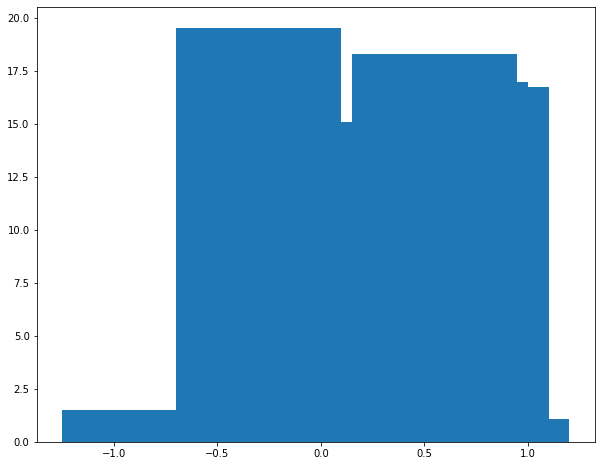

In [29]:
df = pd.read_csv('datasets/pa/mREDUCED_LMA_DATA.csv')
values = df.values
# split into input and output elements
X, y = values[:, :-1], values[:, -1]

# summarize distribution
counter = Counter(y)
perc = []
for k,v in counter.items():
    per = v / len(y) * 100
    perc.append(per)
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
    
    
# plot the distribution
plt.figure(figsize=(10,8))
plt.bar(counter.keys(), perc)
plt.show()

### Undersample

In [31]:
strategy = {-0.7:2000, 0.6 : 2000, -0.5: 2000, -0.3: 2000, -0.4: 2000, 0.0: 2000, 0.2: 184, -0.8: 142, 0.85: 654, 0.6: 84, 0.8: 460}


nm = NearMiss(sampling_strategy=strategy)
X_res, y_res = nm.fit_resample(X, y)

# summarize distribution
counter = Counter(y_res)
perc = []
for k,v in counter.items():
    per = v / len(y) * 100
    perc.append(per)
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
    
    
# plot the distribution
plt.figure(figsize=(10,8))
plt.bar(counter.keys(), counter.values())
plt.show()

ValueError: Unknown label type: 'continuous'

### SMOTE

Class=afraid, n=2000 (9.091%)
Class=angry, n=2000 (9.091%)
Class=bored, n=2000 (9.091%)
Class=disgusted, n=2000 (9.091%)
Class=excited, n=2000 (9.091%)
Class=happy, n=2000 (9.091%)
Class=neutral, n=2000 (9.091%)
Class=pleased, n=2000 (9.091%)
Class=relaxed, n=2000 (9.091%)
Class=sad, n=2000 (9.091%)
Class=tired, n=2000 (9.091%)


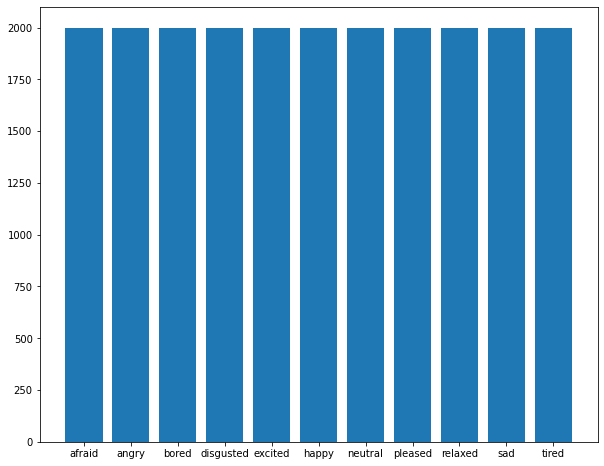

In [55]:
strategy = {"angry":2000, "happy": 2000, "sad": 2000, "disgusted": 2000, "afraid": 2000, "neutral": 2000, "pleased": 2000, "bored": 2000, "tired": 2000, "relaxed": 2000, "excited": 2000}

# transform the dataset
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X_res, y_res)

# summarize distribution
counter = Counter(y)
perc = []
for k,v in counter.items():
    per = v / len(y) * 100
    perc.append(per)
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
    
# plot the distribution
plt.figure(figsize=(10,8))
plt.bar(counter.keys(), counter.values())
plt.show()

### Store data

In [56]:
data = pd.read_csv('datasets/pa/LMA_DATA.csv')

with open('../datasets/label/LMA_BALANCED.csv', 'w', newline='') as balanced_data:
    writer = csv.writer(balanced_data, delimiter=',')
    
    #Add header
    writer.writerow(data.columns)
    index = 0
    for i in range(0,len(y)):
        new_row = []
        for j in range(0,len(X[i])):
            new_row.append(X[i][j])
        new_row.append(y[i])
                    
        writer.writerow(new_row)

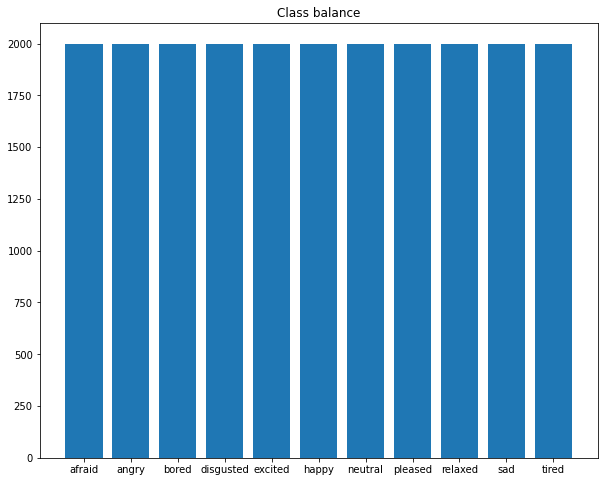

Minority class: 2000
Majority class: 2000
Proportion: 1.0 : 1.0


In [57]:
data = pd.read_csv('datasets/pa/LMA_BALANCED.csv')

target_count = data['EMOTION'].value_counts()

plt.figure(figsize=(10,8))
plt.title('Class balance')
plt.bar([str(a) for a in target_count.index], target_count.values)
plt.show()
min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1.0')

## Data Normalization

In [50]:
data = pd.read_csv('datasets/pa/mREDUCED_LMA_DATA.csv')

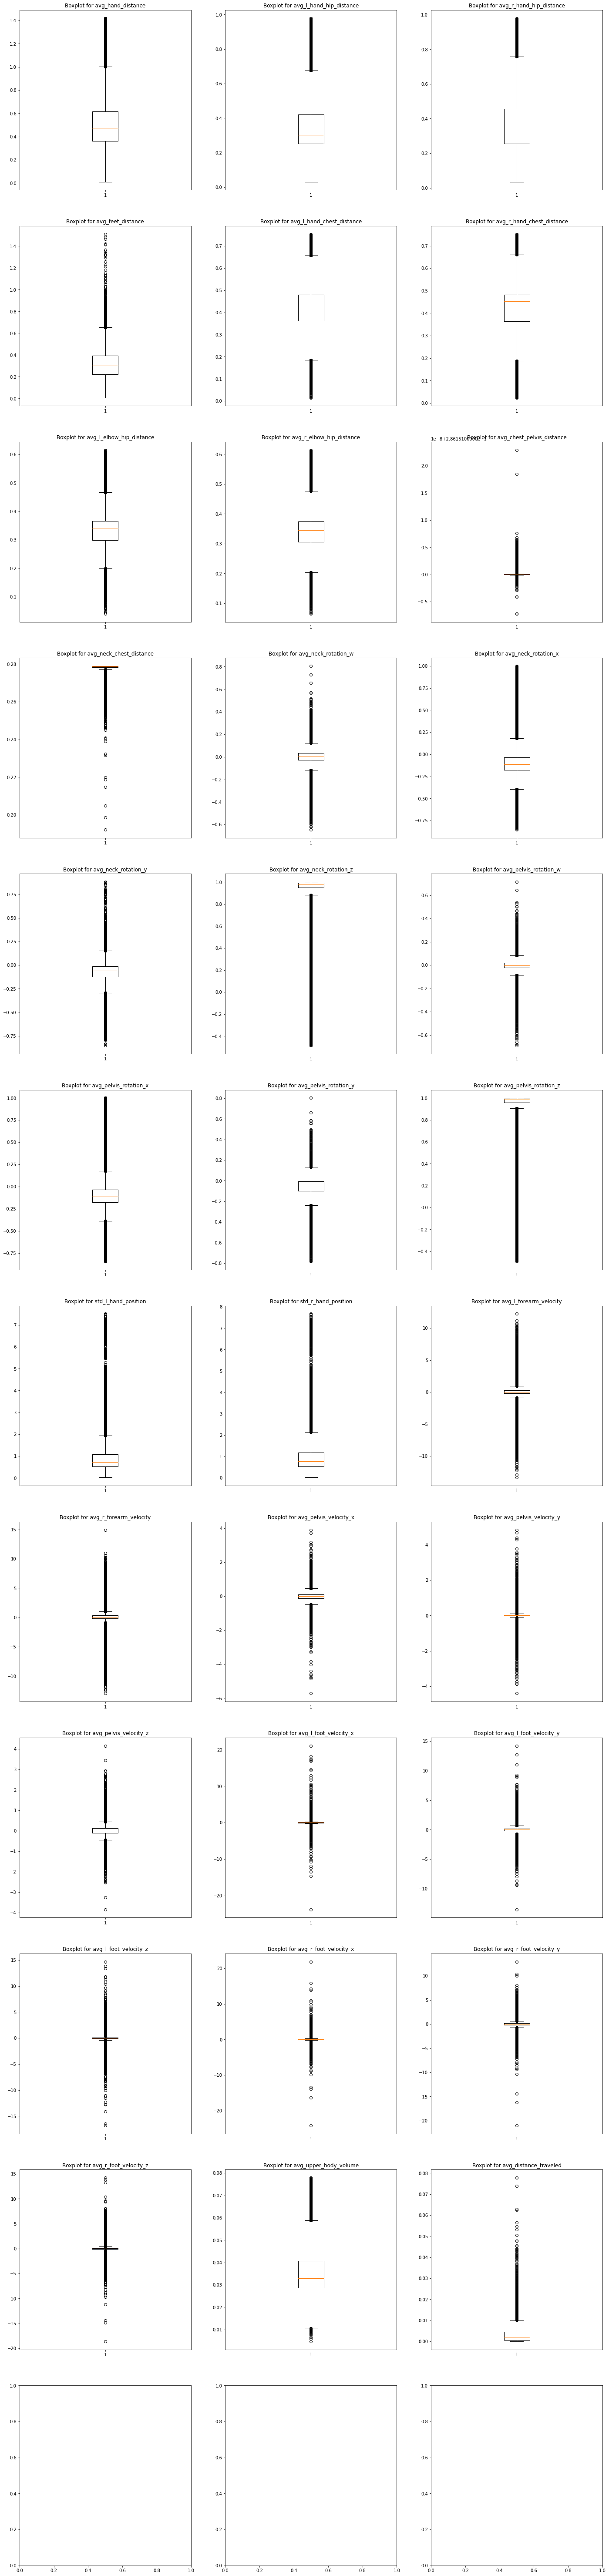

In [51]:
target = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A']], axis=1)

numeric_vars = data.columns

rows = 12
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(data[numeric_vars[n]].values)))
    axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
    axs[i, j].boxplot(data[numeric_vars[n]].dropna().values)
    
    i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
    
plt.show()

In [52]:
numeric_data = data

transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(numeric_data)
minMaxData = pd.DataFrame(transf.transform(numeric_data), columns = numeric_data.columns)
minMaxData.describe(include='all')

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_pelvis_velocity_y,avg_pelvis_velocity_z,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_distance_traveled
count,43039.000000,43039.000000,43039.000000,43039.000000,43039.000000,43039.000000,43039.000000,43039.000000,43039.000000,43039.000000,...,43039.000000,43039.000000,43039.000000,43039.000000,43039.000000,43039.000000,43039.000000,43039.000000,43039.000000,43039.000000
mean,0.350475,0.338648,0.355924,0.206664,0.548698,0.550509,0.511949,0.505604,0.242563,0.987646,...,0.476655,0.481731,0.531174,0.487488,0.533534,0.525418,0.618930,0.566788,0.425642,0.040865
std,0.173379,0.157975,0.171629,0.094462,0.154870,0.157937,0.134482,0.143386,0.017181,0.031260,...,0.029466,0.045363,0.014578,0.028347,0.026495,0.012722,0.023224,0.025466,0.153056,0.048093
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.248574,0.232608,0.233941,0.141681,0.469974,0.468575,0.450496,0.439516,0.239011,0.991714,...,0.473563,0.467570,0.529673,0.481100,0.530424,0.524118,0.613873,0.563730,0.327951,0.008388
50%,0.329919,0.286310,0.298906,0.196600,0.591311,0.588934,0.523031,0.509406,0.239897,0.997679,...,0.476847,0.481117,0.531048,0.487438,0.533670,0.525443,0.619042,0.566807,0.384778,0.026987
75%,0.430932,0.411552,0.446510,0.256765,0.629450,0.630960,0.567278,0.563797,0.241030,0.999331,...,0.479801,0.495521,0.532438,0.493362,0.537003,0.526800,0.623914,0.570054,0.492658,0.056931
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


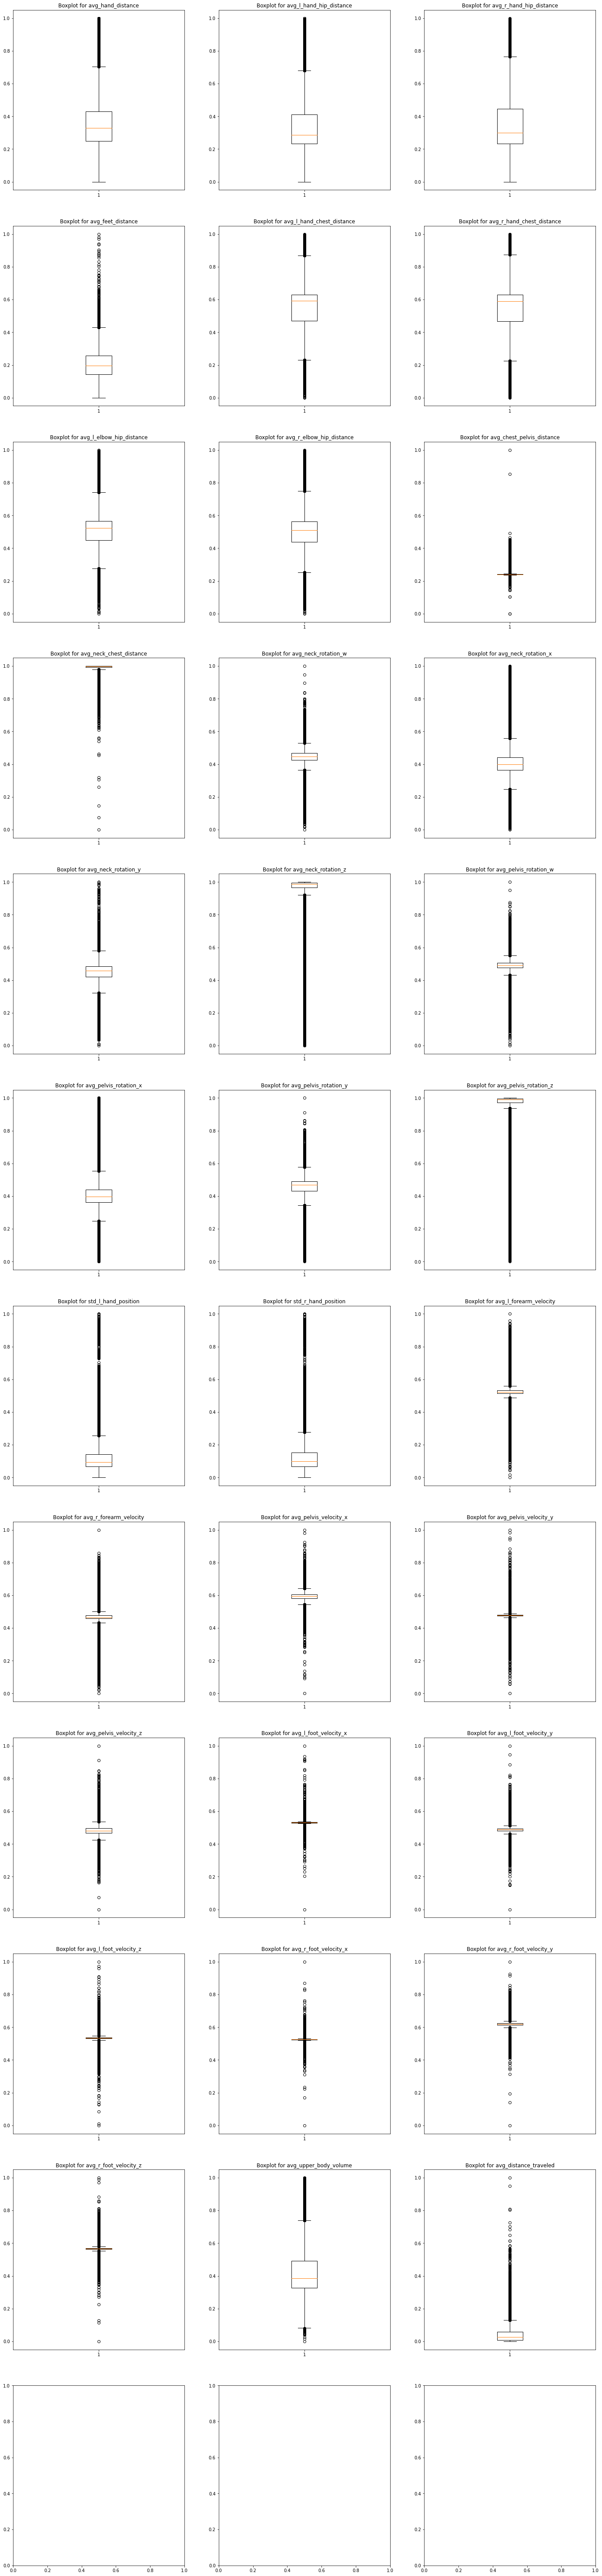

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_pelvis_velocity_y,avg_pelvis_velocity_z,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_distance_traveled
0,0.305333,0.250517,0.208571,0.169970,0.615949,0.590264,0.541218,0.491426,0.240670,0.998298,...,0.479031,0.479447,0.531014,0.487284,0.533560,0.525409,0.618916,0.566701,0.326178,0.002254
1,0.302666,0.248653,0.207149,0.175342,0.614838,0.589408,0.540210,0.490364,0.239083,0.998321,...,0.477295,0.480878,0.531009,0.487390,0.533280,0.525404,0.619003,0.566432,0.325341,0.000730
2,0.297861,0.245660,0.204358,0.180618,0.613106,0.587753,0.538782,0.488354,0.238480,0.998350,...,0.476715,0.481794,0.531030,0.487825,0.533192,0.525425,0.619359,0.566347,0.323754,0.002218
3,0.291061,0.244052,0.198080,0.186578,0.612453,0.583900,0.538507,0.483733,0.240266,0.998541,...,0.473486,0.475433,0.530270,0.487524,0.533584,0.524683,0.619113,0.566724,0.321151,0.012095
4,0.279833,0.243384,0.192318,0.192319,0.589546,0.565922,0.522783,0.469268,0.239577,0.998071,...,0.470431,0.523631,0.531344,0.482594,0.534513,0.525731,0.615078,0.567615,0.328638,0.036687


In [53]:
numeric_vars = minMaxData.select_dtypes(include='number').columns
rows = 12
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(minMaxData[numeric_vars[n]].values)))
    #only boxplot non boolean vars
    if num_unique == 2:
        off+=1
    else:
        axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
        axs[i, j].boxplot(minMaxData[numeric_vars[n]].dropna().values)
        i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
plt.show()

minMaxData.head()

In [54]:
#Store MinMaxScaler

minMaxDataFull = minMaxData.join(target, how='right')
minMaxDataFull.to_csv(r'datasets/pa/NFS_LMA_DATA.csv', index = False)